# Extreme Value Analysis

In [1]:
import matplotlib
%matplotlib inline
import pandas as pd
from statista.distributions import GEV, ConfidenceInterval, Gumbel, PlottingPosition

In [2]:
import os
os.chdir(r"C:\gdrive\01Algorithms\Statistics\statista")
time_series1 = pd.read_csv("examples/data/time_series1.txt", header=None)[0].tolist()
time_series2 = pd.read_csv("examples/data/time_series2.txt", header=None)[0].tolist()

# Gumbel Distribution

-----KS Test--------
Statistic = 0.18518518518518517
Accept Hypothesis
P value = 0.7536974563793281
-----chisquare Test-----
Statistic = -1.7297426599910237
P value = 1.0
-----KS Test--------
Statistic = 0.18518518518518517
Accept Hypothesis
P value = 0.7536974563793281
-----chisquare Test-----
Statistic = -1.7297426599910237
P value = 1.0
[16.470245610977667, 0.724486313118949]


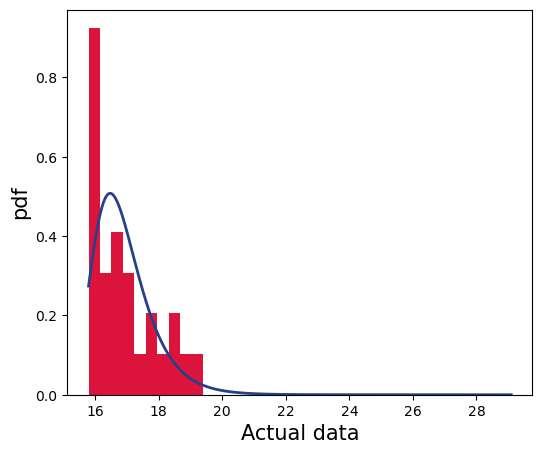

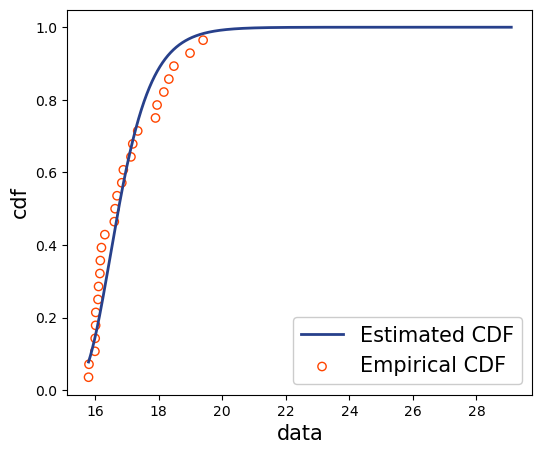

In [4]:
Gdist = Gumbel(time_series1)
# defult parameter estimation method is maximum liklihood method
Param_mle = Gdist.estimateParameter(method="mle")
Gdist.ks()
Gdist.chisquare()
print(Param_mle)
loc = Param_mle[0]
scale = Param_mle[1]
# calculate and plot the pdf
pdf = Gdist.pdf(loc, scale, plot_figure=True)
cdf, _, _ = Gdist.cdf(loc, scale, plot_figure=True)

## Fit distribution using lmoments

-----KS Test--------
Statistic = 0.14814814814814814
Accept Hypothesis
P value = 0.9356622290518453
-----chisquare Test-----
Statistic = -1.7297426599910917
P value = 1.0
-----KS Test--------
Statistic = 0.14814814814814814
Accept Hypothesis
P value = 0.9356622290518453
-----chisquare Test-----
Statistic = -1.7297426599910917
P value = 1.0
[16.44841695242862, 0.8328854157603985]


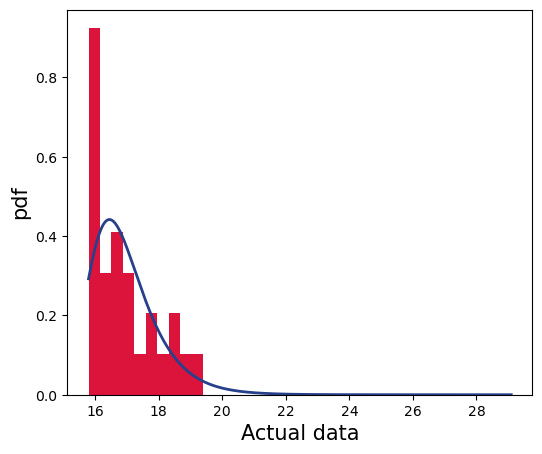

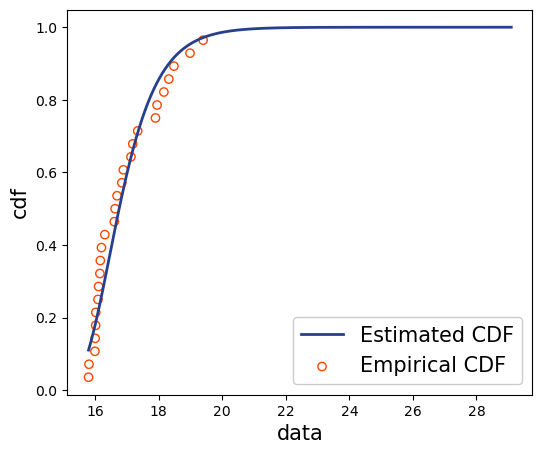

In [5]:
Param_lmoments = Gdist.estimateParameter(method="lmoments")
Gdist.ks()
Gdist.chisquare()
print(Param_lmoments)
loc = Param_lmoments[0]
scale = Param_lmoments[1]
# calculate and plot the pdf
pdf = Gdist.pdf(loc, scale, plot_figure=True)
cdf, _, _ = Gdist.cdf(loc, scale, plot_figure=True)

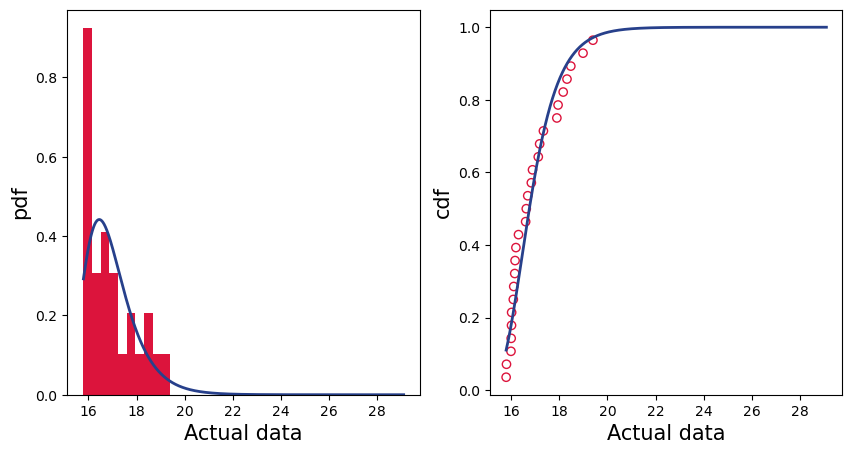

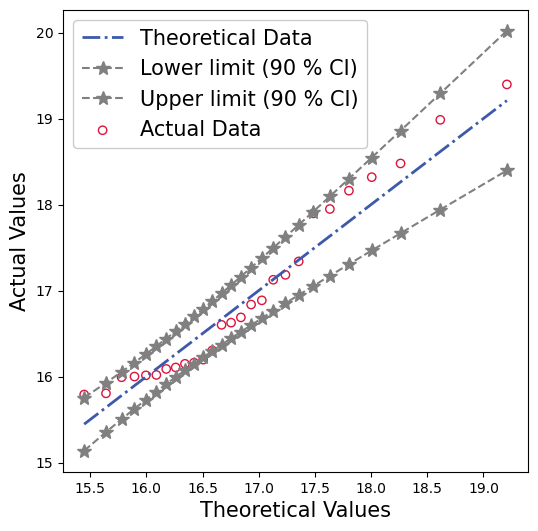

In [6]:
# calculate the CDF(Non Exceedance probability) using weibul plotting position
time_series1.sort()
# calculate the F (Non Exceedence probability based on weibul)
cdf_Weibul = PlottingPosition.weibul(time_series1)
# TheporeticalEstimate method calculates the theoretical values based on the Gumbel distribution
Qth = Gdist.theporeticalEstimate(loc, scale, cdf_Weibul)
# test = stats.chisquare(st.Standardize(Qth), st.Standardize(time_series1),ddof=5)
# calculate the confidence interval
upper, lower = Gdist.confidenceInterval(loc, scale, cdf_Weibul, alpha=0.1)
# ProbapilityPlot can estimate the Qth and the lower and upper confidence interval in the process of plotting
fig, ax = Gdist.probapilityPlot(loc, scale, cdf_Weibul, alpha=0.1)

## Fit distribution by focuing on part of the data

if you want to focus only on high values, you can use a threshold to make the code focus on what is higher
this threshold.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 94
-----KS Test--------
Statistic = 0.25925925925925924
reject Hypothesis
P value = 0.3290078898658627
-----chisquare Test-----
Statistic = -1.7297426599910737
P value = 1.0
[16.653248339988547, 0.7969349444308436]


([<Figure size 1000x500 with 2 Axes>, <Figure size 600x600 with 1 Axes>],
 [<AxesSubplot: xlabel='Actual data', ylabel='pdf'>,
  <AxesSubplot: xlabel='Actual data', ylabel='cdf'>])

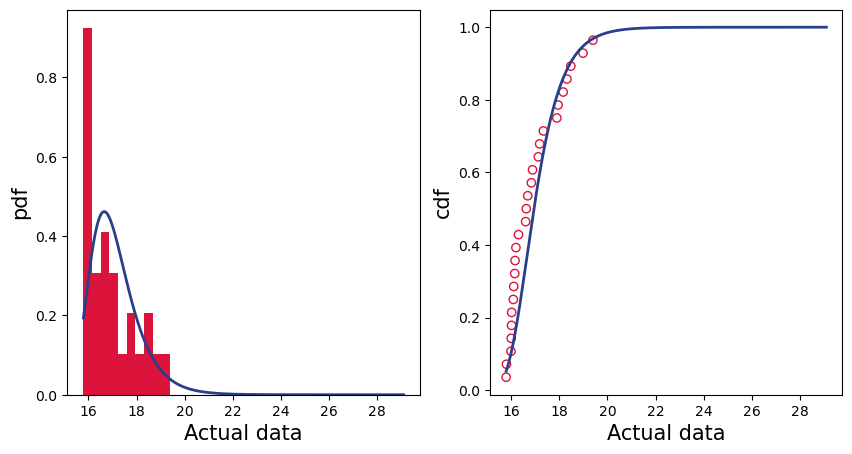

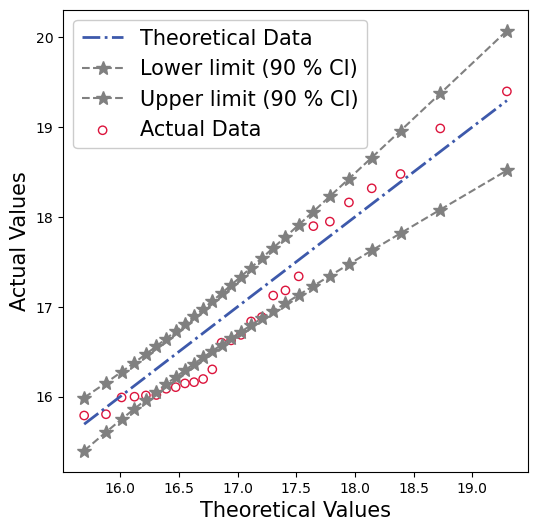

In [8]:
threshold = 17
Param_dist = Gdist.estimateParameter(
    method="optimization", ObjFunc=Gumbel.ObjectiveFn, threshold=threshold
)
print(Param_dist)
loc = Param_dist[0]
scale = Param_dist[1]
Gdist.probapilityPlot(loc, scale, cdf_Weibul, alpha=0.1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 96
-----KS Test--------
Statistic = 0.2222222222222222
Accept Hypothesis
P value = 0.5256377612776422
For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
56.0
[16.607497657735827, 0.8351717220676762]


([<Figure size 1000x500 with 2 Axes>, <Figure size 600x600 with 1 Axes>],
 [<AxesSubplot: xlabel='Actual data', ylabel='pdf'>,
  <AxesSubplot: xlabel='Actual data', ylabel='cdf'>])

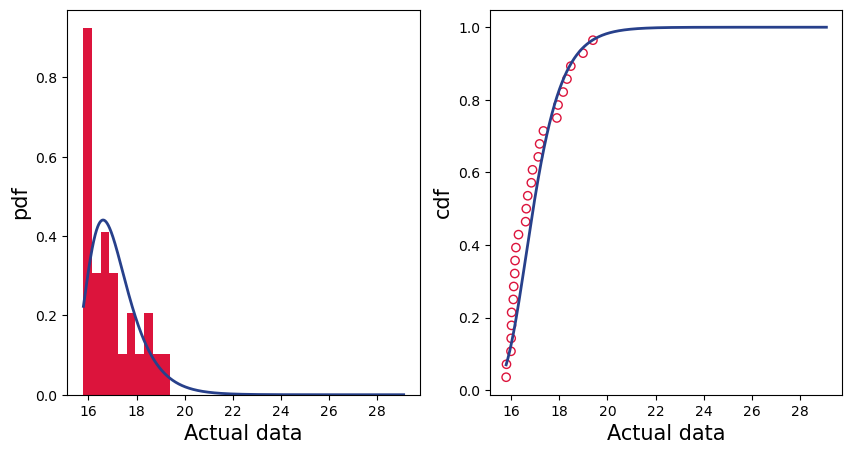

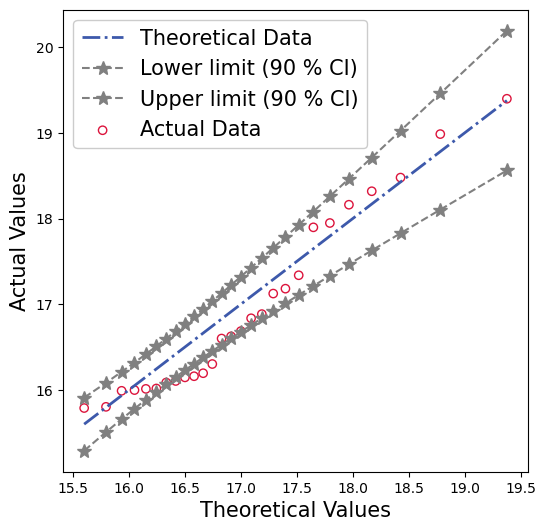

In [9]:
threshold = 18
Param_dist = Gdist.estimateParameter(
    method="optimization", ObjFunc=Gumbel.ObjectiveFn, threshold=threshold
)
print(Param_dist)
loc = Param_dist[0]
scale = Param_dist[1]
Gdist.probapilityPlot(loc, scale, cdf_Weibul, alpha=0.1)

# Generalized Extreme Value (GEV)

-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
-----chisquare Test-----
Statistic = -0.3032646471545644
P value = 1.0
-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
-----chisquare Test-----
Statistic = -0.3032646471545644
P value = 1.0
[0.005714016754089981, 466.7783159128223, 214.7439840776729]


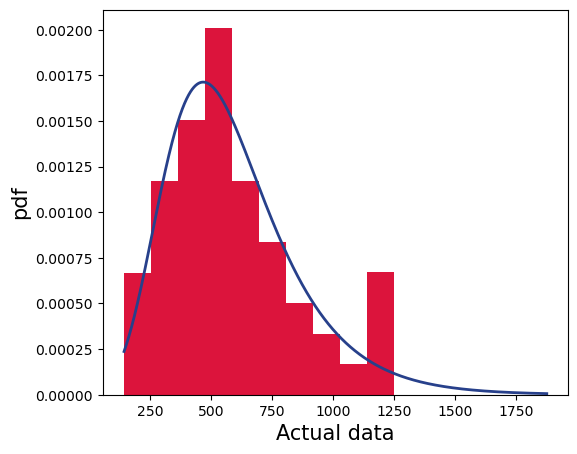

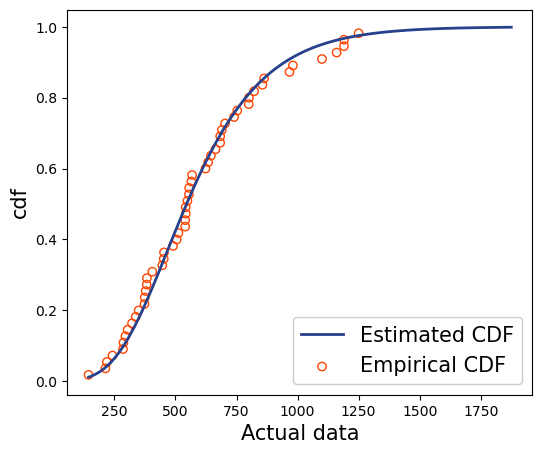

In [10]:
Gevdist = GEV(time_series2)
# default parameter estimation method is maximum liklihood method
Param_dist = Gevdist.estimateParameter()
Gevdist.ks()
Gevdist.chisquare()

print(Param_dist)
shape = Param_dist[0]
loc = Param_dist[1]
scale = Param_dist[2]
# calculate and plot the pdf
pdf, fig, ax = Gevdist.pdf(shape, loc, scale, plot_figure=True)
cdf, _, _ = Gevdist.cdf(shape, loc, scale, plot_figure=True)

## Fitting distribution using L moments method

-----KS Test--------
Statistic = 0.07407407407407407
Accept Hypothesis
P value = 0.9987375782247235
-----chisquare Test-----
Statistic = -0.3202644847766967
P value = 1.0
[0.010122582419885787, 464.8250207300632, 222.12098731051674]


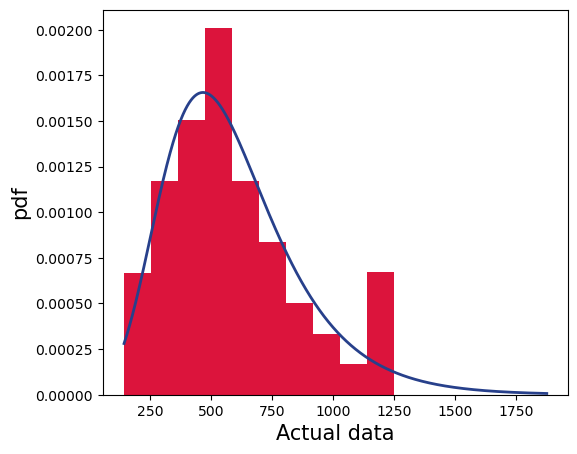

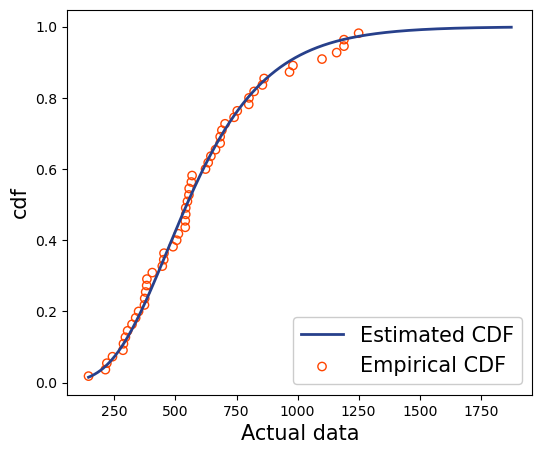

In [12]:
Param_dist = Gevdist.estimateParameter(method="lmoments")
print(Param_dist)
shape = Param_dist[0]
loc = Param_dist[1]
scale = Param_dist[2]
# calculate and plot the pdf
pdf, fig, ax = Gevdist.pdf(shape, loc, scale, plot_figure=True)
cdf, _, _ = Gevdist.cdf(shape, loc, scale, plot_figure=True)

In [13]:
time_series1.sort()
# calculate the F (Non Exceedence probability based on weibul)
cdf_Weibul = PlottingPosition.weibul(time_series1)
T = PlottingPosition.weibul(time_series1, option=2)
# TheporeticalEstimate method calculates the theoretical values based on the Gumbel distribution
Qth = Gevdist.theporeticalEstimate(shape, loc, scale, cdf_Weibul)

func = GEV.ci_func
upper, lower = Gevdist.confidenceInterval(
    shape,
    loc,
    scale,
    F=cdf_Weibul,
    alpha=0.1,
    statfunction=func,
    n_samples=len(time_series1),
)

2023-02-19 19:49:45.311 | DEBUG    | statista.confidence_interval:BootStrap:97 - Some values used top 10 low/high samples; results may be unstable.


In [14]:
CI = ConfidenceInterval.BootStrap(
    time_series1,
    statfunction=func,
    gevfit=Param_dist,
    n_samples=len(time_series1),
    F=cdf_Weibul,
)
LB = CI["LB"]
UB = CI["UB"]

2023-02-19 19:50:02.989 | DEBUG    | statista.confidence_interval:BootStrap:97 - Some values used top 10 low/high samples; results may be unstable.


2023-02-19 19:50:13.909 | DEBUG    | statista.confidence_interval:BootStrap:97 - Some values used top 10 low/high samples; results may be unstable.


ValueError: x and y must be the same size

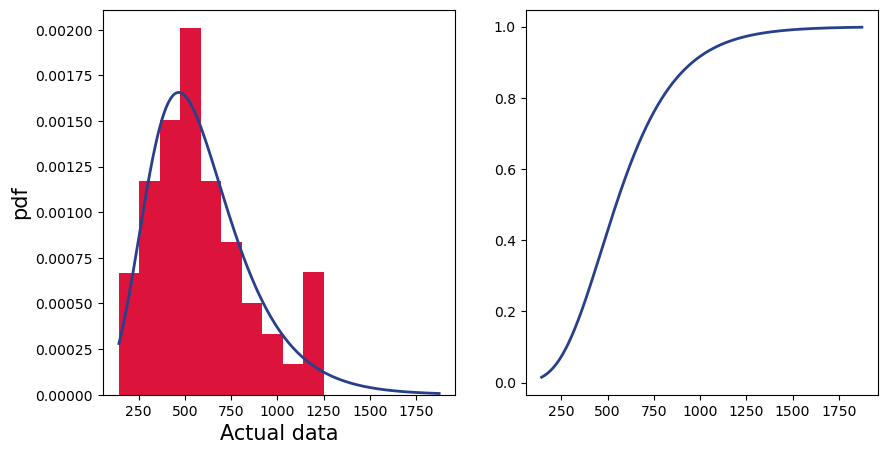

In [15]:
fig, ax = Gevdist.probapilityPlot(
    shape, loc, scale, cdf_Weibul, func=func, n_samples=len(time_series1)
)
